# EDA with snowfall data

### Import modules

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.figsize":(13, 8)},font_scale=1.5, style="whitegrid")

### Read in .csv into Pandas DataFrame
- Data: Texas A&M Univ Southern Regional Climate Center's [Climate Data Portal](https://www.srcc.tamu.edu/climate_data_portal/?product=annual_summaries)
- Station: Nashville Intl Airport (BNA)
- Daily Lister from 01/01/1988 to 11/30/2021

In [50]:
snow_df = pd.read_csv('../data/clean_61.csv')

In [51]:
snow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21916 entries, 0 to 21915
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    21916 non-null  object 
 1   maxt    21916 non-null  int64  
 2   mint    21916 non-null  int64  
 3   avgt    21916 non-null  float64
 4   pcpn    19610 non-null  float64
 5   snow    21187 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.0+ MB


In [52]:
snow_df.head()

,Date,maxt,mint,avgt,pcpn,snow
0,1961-11-30,57,20,38.5,0.00,0.0
1,1961-12-01,60,38,49.0,0.00,0.0
2,1961-12-02,62,52,57.0,NaN,0.0
3,1961-12-03,73,52,62.5,0.00,0.0
4,1961-12-04,70,57,63.5,0.61,0.0


In [53]:
#snow_df[['pcpn', 'snow', 'snwd']] = snow_df[['pcpn', 'snow', 'snwd']].fillna(value=0)

### Convert Date column to datetime datatype

In [54]:
snow_df['Date'] = pd.to_datetime(snow_df['Date'])

In [55]:
snow_df = snow_df.groupby(pd.Grouper(key='Date', axis=0, freq='Y')).mean()

[Text(0.5, 1.0, 'Annual Snowfall')]

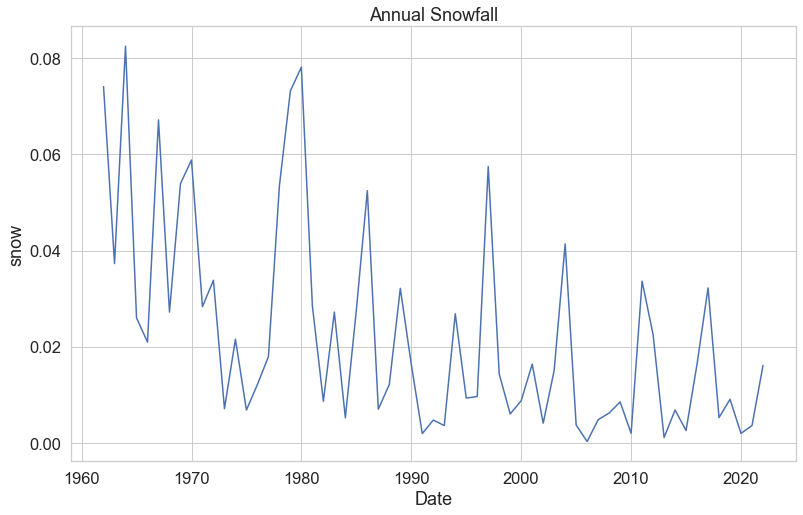

In [60]:
sns.lineplot(
    data = snow_df,
    x = 'Date',
    y = 'snow',
    ci = None
).set(title='Annual Snowfall')

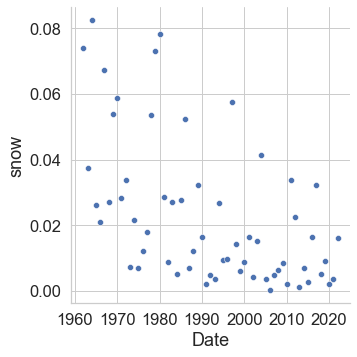

In [62]:
sns.relplot(data=snow_df, x='Date', y='snow') 